In [1]:
!pip install tabulate

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from learntools.time_series.style import *

from sklearn.linear_model import LinearRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-tech-giants-stock-price-data/big_tech_stock_prices.csv
/kaggle/input/big-tech-giants-stock-price-data/big_tech_companies.csv


In [3]:
ls = ['big_tech_stock_prices', 'big_tech_companies']

def info(df):
    info = []
    for col in df.columns:
        dtype = df[col].dtype
        non_nulls = df[col].notna().sum()
        nulls = df[col].isna().sum()
        info.append([col, dtype, non_nulls, nulls])
    
    return tabulate(info, headers=["Column", "Dtype", "Non-Null Count", "Null Count"], tablefmt="fancy_grid")


# Load DataFrames into a dictionary
dfs = {name: pd.read_csv(f'/kaggle/input/big-tech-giants-stock-price-data/{name}.csv') for name in ls}

# Print beautified info for each DataFrame
for name, df in dfs.items():
    print(f"\n{name}\n{'=' * len(name)}")
    print(info(df))


big_tech_stock_prices
╒══════════════╤═════════╤══════════════════╤══════════════╕
│ Column       │ Dtype   │   Non-Null Count │   Null Count │
╞══════════════╪═════════╪══════════════════╪══════════════╡
│ stock_symbol │ object  │            45088 │            0 │
├──────────────┼─────────┼──────────────────┼──────────────┤
│ date         │ object  │            45088 │            0 │
├──────────────┼─────────┼──────────────────┼──────────────┤
│ open         │ float64 │            45088 │            0 │
├──────────────┼─────────┼──────────────────┼──────────────┤
│ high         │ float64 │            45088 │            0 │
├──────────────┼─────────┼──────────────────┼──────────────┤
│ low          │ float64 │            45088 │            0 │
├──────────────┼─────────┼──────────────────┼──────────────┤
│ close        │ float64 │            45088 │            0 │
├──────────────┼─────────┼──────────────────┼──────────────┤
│ adj_close    │ float64 │            45088 │            0 │
├

In [4]:
df = dfs['big_tech_stock_prices']
df.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

unique_dates = df.index.unique()
date_to_int = {date: idx for idx, date in enumerate(unique_dates)}

df['time'] = df.index.map(date_to_int)
df.head()

,stock_symbol,open,high,low,close,adj_close,volume,time
date,,,,,,,,
2010-01-04,AAPL,7.622500,7.660714,7.585000,7.643214,6.515213,493729600,0
2010-01-05,AAPL,7.664286,7.699643,7.616071,7.656429,6.526476,601904800,1
2010-01-06,AAPL,7.656429,7.686786,7.526786,7.534643,6.422664,552160000,2
2010-01-07,AAPL,7.562500,7.571429,7.466071,7.520714,6.410790,477131200,3
2010-01-08,AAPL,7.510714,7.571429,7.466429,7.570714,6.453412,447610800,4


In [6]:
df = df[(df['stock_symbol'] == 'CRM') & (df.index.year == 2010)]
df

,stock_symbol,open,high,low,close,adj_close,volume,time
date,,,,,,,,
2010-01-04,CRM,18.652500,18.882500,18.547501,18.705000,18.705000,7906000,0
2010-01-05,CRM,18.612499,18.750000,18.200001,18.625000,18.625000,7942400,1
2010-01-06,CRM,18.687500,18.750000,18.495001,18.592501,18.592501,5122400,2
2010-01-07,CRM,18.629999,18.737499,18.385000,18.510000,18.510000,4840000,3
2010-01-08,CRM,18.517500,18.587500,18.315001,18.537500,18.537500,5510400,4
...,...,...,...,...,...,...,...,...
2010-12-27,CRM,33.810001,33.837502,33.127499,33.502499,33.502499,6361600,247
2010-12-28,CRM,33.692501,33.692501,33.077499,33.330002,33.330002,4158800,248
2010-12-29,CRM,33.362499,33.592499,33.082500,33.237499,33.237499,5374800,249


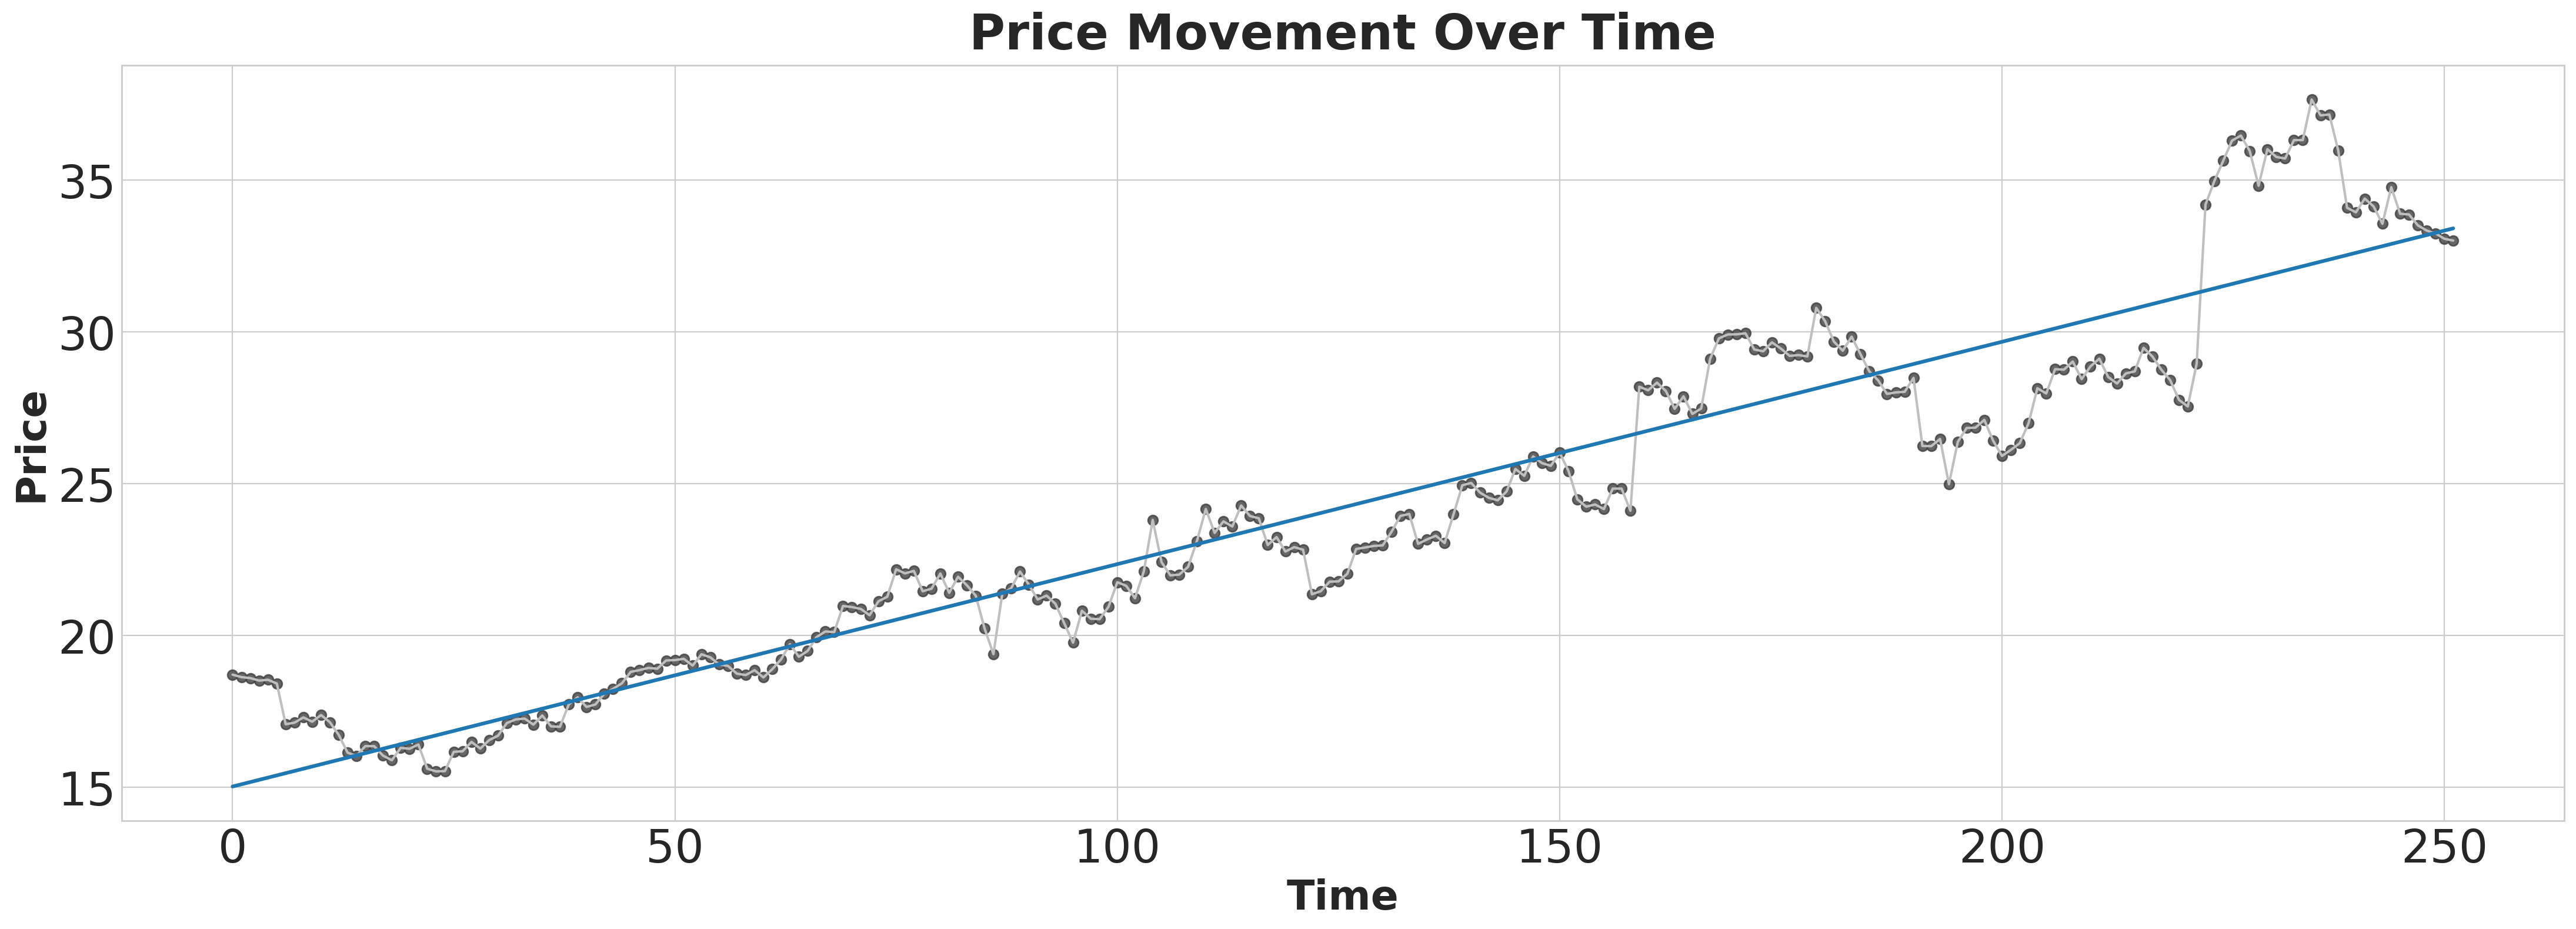

In [7]:
# Plotting
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(22, 8),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

%config InlineBackend.figure_format = 'retina'


fig, ax = plt.subplots()
sns.lineplot(x='time', y='adj_close', data=df, ax=ax, color='0.75')
sns.regplot(x='time', y='adj_close', data=df, ax=ax, ci=None, scatter_kws=dict(color='0.25'))


ax.set_title('Price Movement Over Time', fontsize=30)
ax.set_xlabel('Time', fontsize=25)
ax.set_ylabel('Price', fontsize=25)

ax.tick_params(axis='both', labelsize=28)

plt.show()

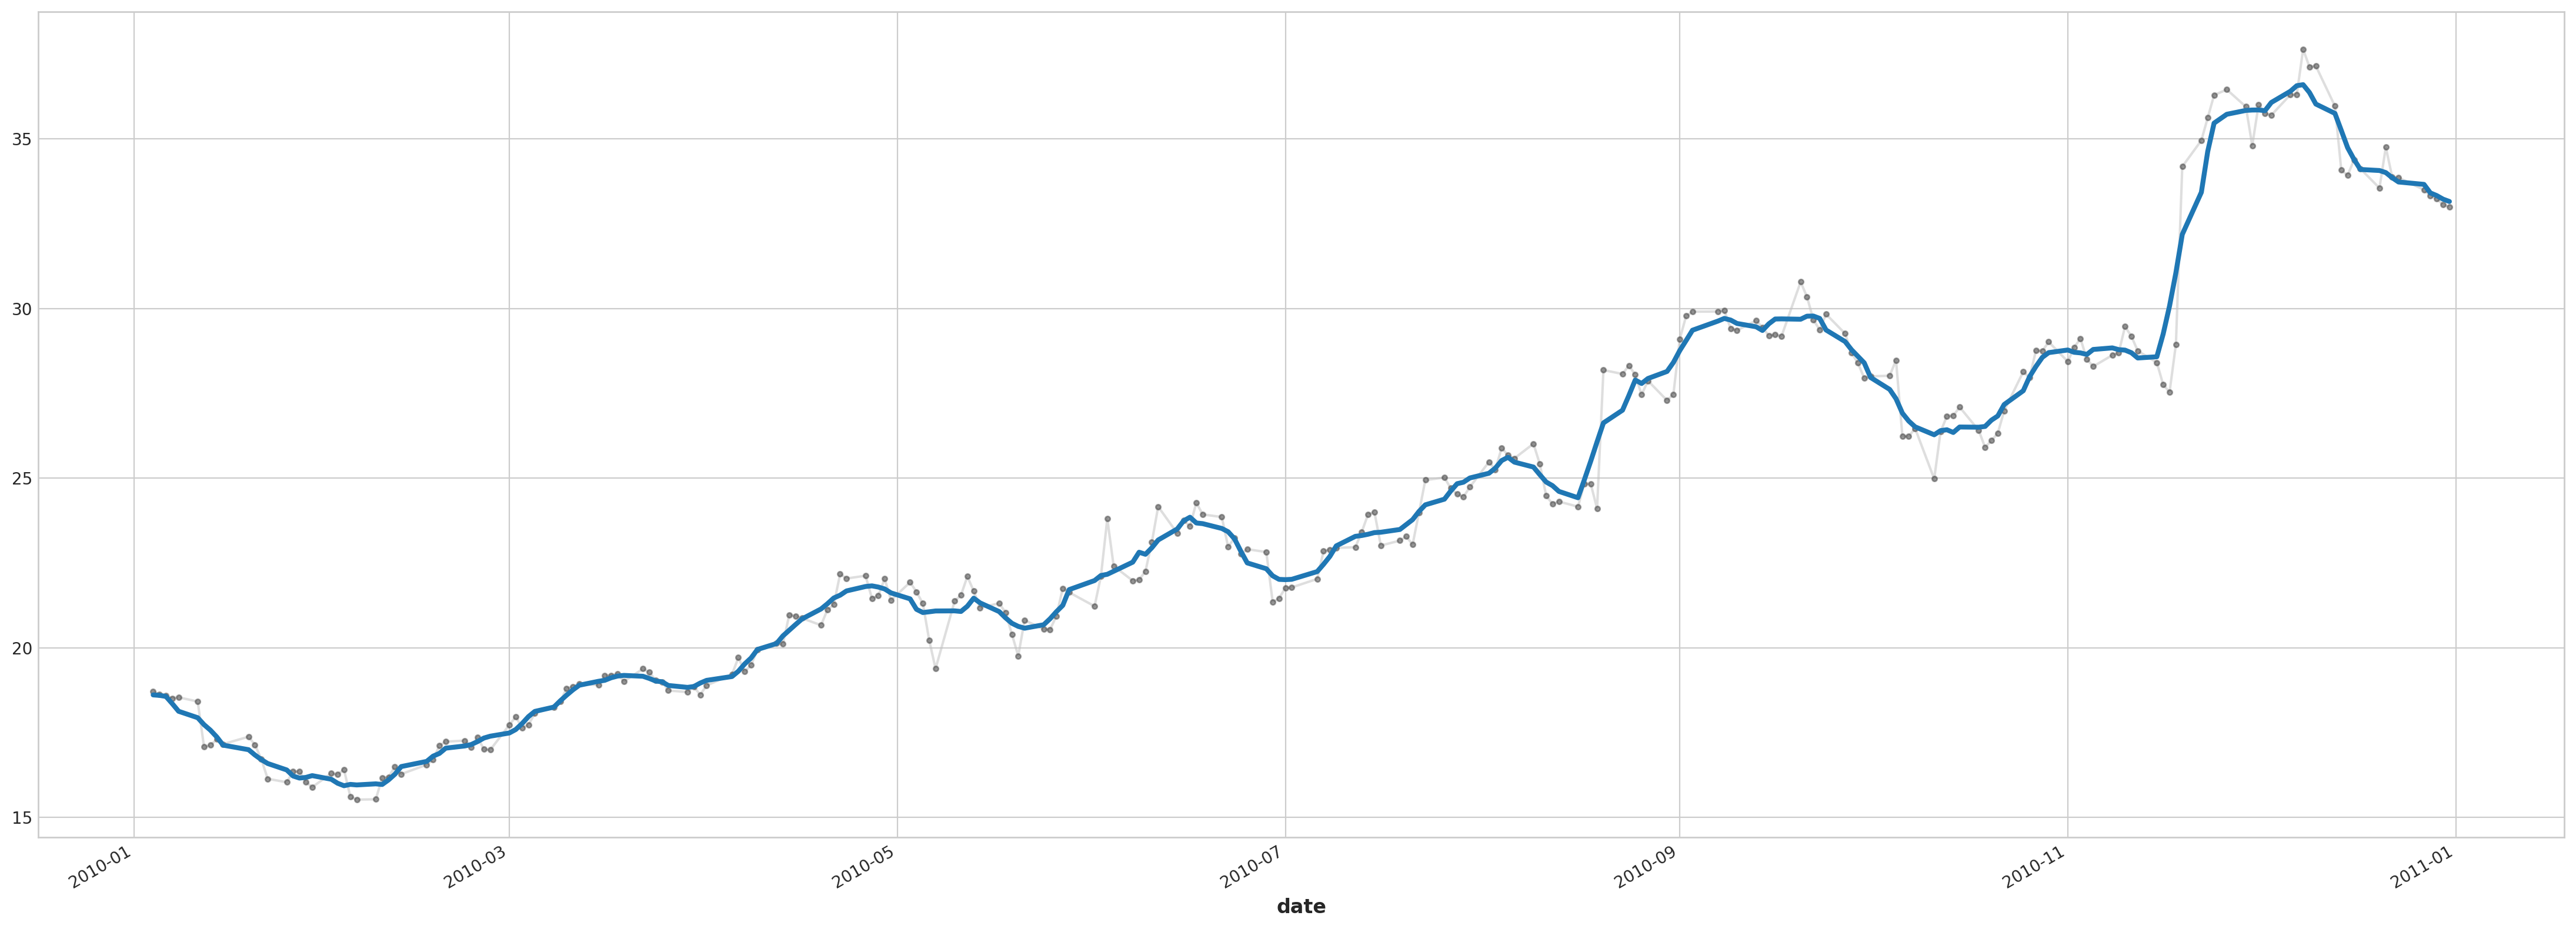

In [8]:
trend = df['adj_close'].rolling(
    window=7,
    center=True,
    min_periods=4,
).mean()


# Make a plot
ax = df['adj_close'].plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

In [9]:
from statsmodels.tsa.deterministic import DeterministicProcess

y = df['adj_close'].copy()  # the target

dp = DeterministicProcess(index = df.index, order=2)

X = dp.in_sample()

X_fore = dp.out_of_sample(steps=30)

forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
X_fore.index = forecast_dates

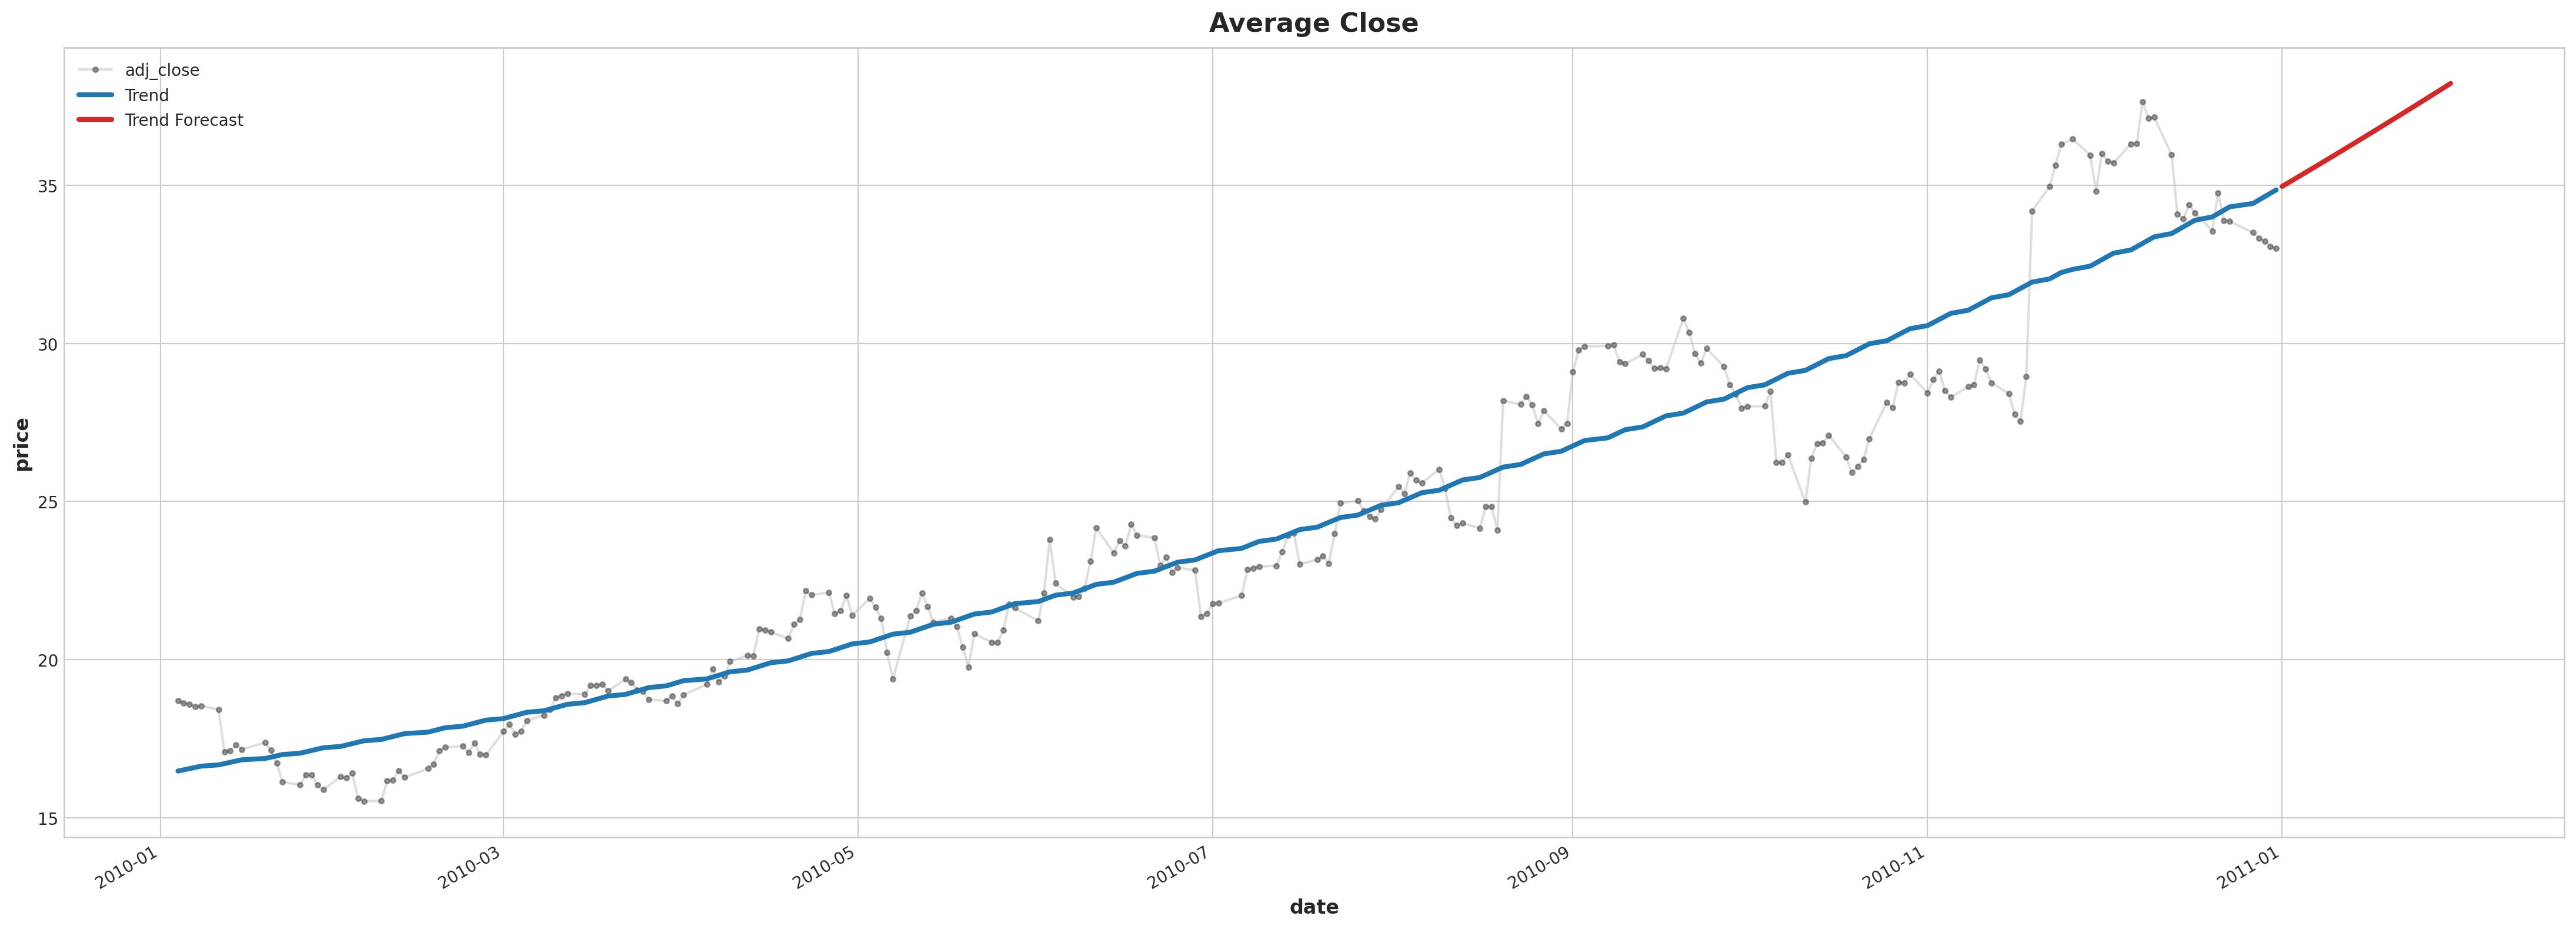

In [10]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(**plot_params, alpha=0.5, title="Average Close", ylabel="price")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();